In [1]:
import pandas as pd
import numpy as np
import os

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
os.getcwd()

'C:\\Users\\Vinod Bhangare\\Downloads'

In [5]:
df=pd.read_csv('C:\\Users\\Vinod Bhangare\\Downloads\\Airbnb NYC 2019 (1).csv')

In [6]:
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


In [7]:
df.columns

Index(['id', 'name', 'host_id', 'host_name', 'neighbourhood_group',
       'neighbourhood', 'latitude', 'longitude', 'room_type', 'price',
       'minimum_nights', 'number_of_reviews', 'last_review',
       'reviews_per_month', 'calculated_host_listings_count',
       'availability_365'],
      dtype='object')

In [8]:
pd.DataFrame(df['room_type'].value_counts().reset_index().rename(columns={'room_type':'No of rooms','index':'Type of rooms'}))

,Type of rooms,No of rooms
0,Entire home/apt,25409
1,Private room,22326
2,Shared room,1160


<AxesSubplot:title={'center':'Type of rooms used based on neighbourhood groups'}, xlabel='room_type', ylabel='count'>

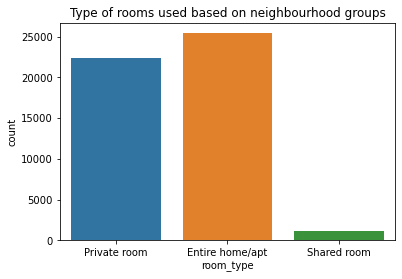

In [9]:
plt.title('Type of rooms used based on neighbourhood groups')
sns.countplot(x=df['room_type'])

<AxesSubplot:title={'center':'Type of rooms used based on neighbourhood groups'}, xlabel='room_type', ylabel='count'>

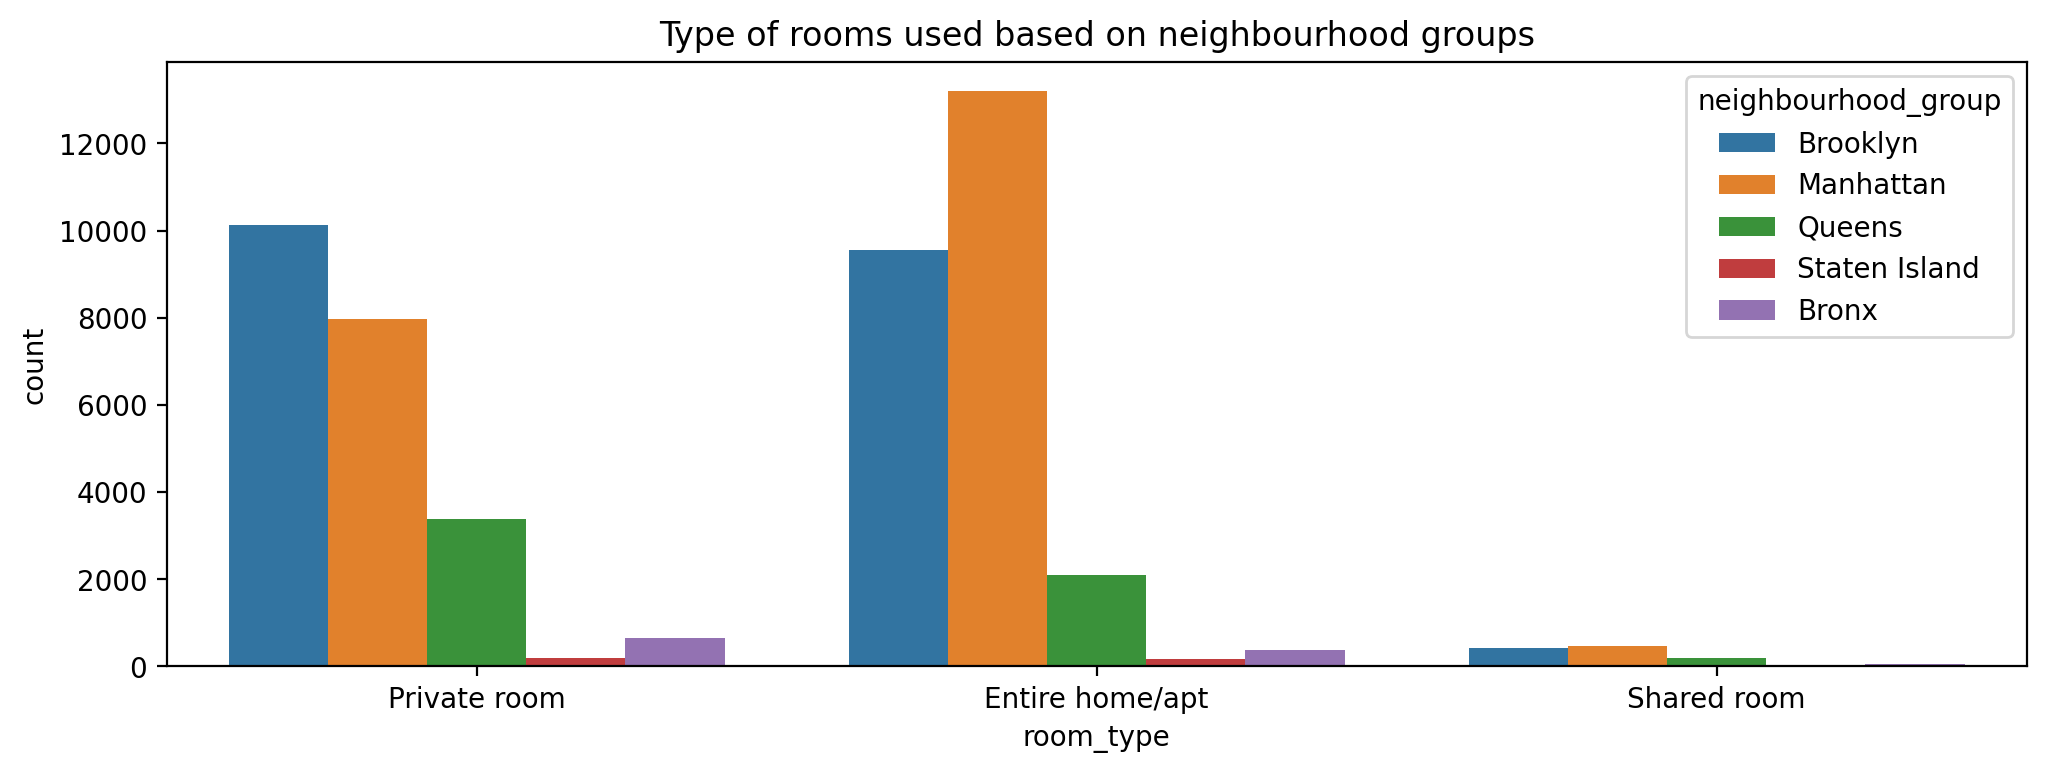

In [10]:
plt.figure(figsize=(12,4),dpi=200)
plt.title('Type of rooms used based on neighbourhood groups')
sns.countplot(x=df['room_type'],hue=df['neighbourhood_group'])

In [11]:
number_of_reviews_df=pd.DataFrame(df.groupby(by=['room_type','neighbourhood_group'])['number_of_reviews'].sum())

In [12]:
number_of_reviews_df

number_of_reviews
room_type       neighbourhood_group                   
Entire home/apt Bronx                            11627
                Brooklyn                        267128
                Manhattan                       235147
                Queens                           60644
                Staten Island                     5857
Private room    Bronx                            16312
                Brooklyn                        213653
                Manhattan                       209150
                Queens                           93561
                Staten Island                     5670
Shared room     Bronx                              432
                Brooklyn                          5793
                Manhattan                        10272
                Queens                            2745
                Staten Island                       14

<AxesSubplot:xlabel='room_type', ylabel='number_of_reviews'>

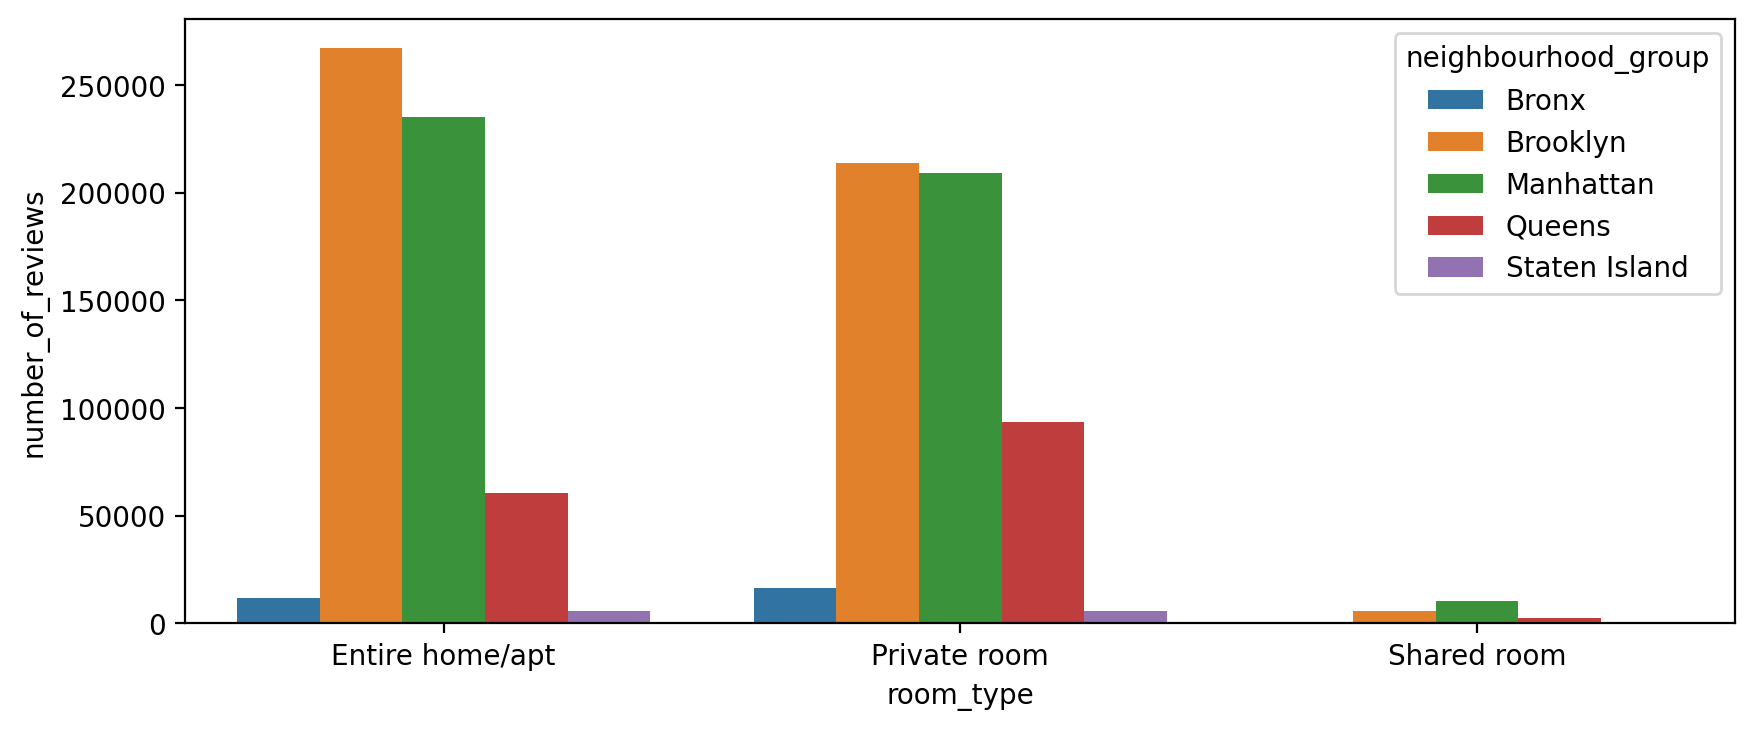

In [13]:
plt.figure(figsize=(10,4),dpi=200)
sns.barplot(data=number_of_reviews_df.reset_index(),x='room_type',y='number_of_reviews',hue='neighbourhood_group')

In [14]:
host_no_of_bookings=pd.DataFrame(df[['host_id','host_name']].value_counts().reset_index().rename(columns={0:'No of bookings'}))

In [15]:
host_no_of_bookings.head(10)

,host_id,host_name,No of bookings
0,219517861,Sonder (NYC),327
1,107434423,Blueground,232
2,30283594,Kara,121
3,137358866,Kazuya,103
4,16098958,Jeremy & Laura,96
5,12243051,Sonder,96
6,61391963,Corporate Housing,91
7,22541573,Ken,87
8,200380610,Pranjal,65
9,1475015,Mike,52


<AxesSubplot:xlabel='price', ylabel='Density'>

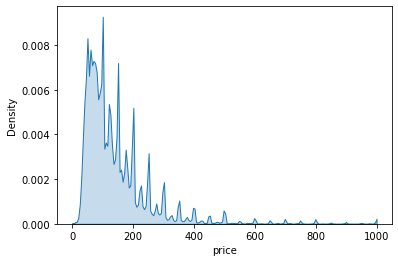

In [16]:
sns.kdeplot(data=df,x='price',clip=[0,1000],bw_adjust=0.1,shade=True)

<AxesSubplot:ylabel='room_type-neighbourhood_group'>

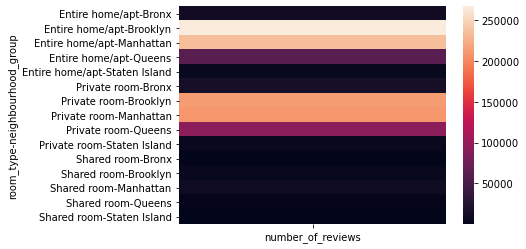

In [17]:
sns.heatmap(number_of_reviews_df)

In [18]:
pd.DataFrame(df['name'].value_counts().reset_index())

,index,name
0,Hillside Hotel,18
1,Home away from home,17
2,New york Multi-unit building,16
3,Brooklyn Apartment,12
4,Loft Suite @ The Box House Hotel,11
...,...,...
47900,MJ house,1
47901,Spacious Gowanus Apt,1
47902,Park Slope Garden Lovers Duplex,1
47903,Beautiful peninsula to stay,1


In [19]:
df['price'].value_counts()

100     2051
150     2047
50      1534
60      1458
200     1401
        ... 
2103       1
1799       1
1095       1
935        1
822        1
Name: price, Length: 674, dtype: int64

In [20]:
host_no_of_bookings.head(10)

,host_id,host_name,No of bookings
0,219517861,Sonder (NYC),327
1,107434423,Blueground,232
2,30283594,Kara,121
3,137358866,Kazuya,103
4,16098958,Jeremy & Laura,96
5,12243051,Sonder,96
6,61391963,Corporate Housing,91
7,22541573,Ken,87
8,200380610,Pranjal,65
9,1475015,Mike,52


In [21]:
def func(pct, allvals):
    absolute = int(np.round(pct/100.*np.sum(allvals)))
    return f"{absolute}"

Text(0.5, 1.0, 'Top 10 most bookings by a host')

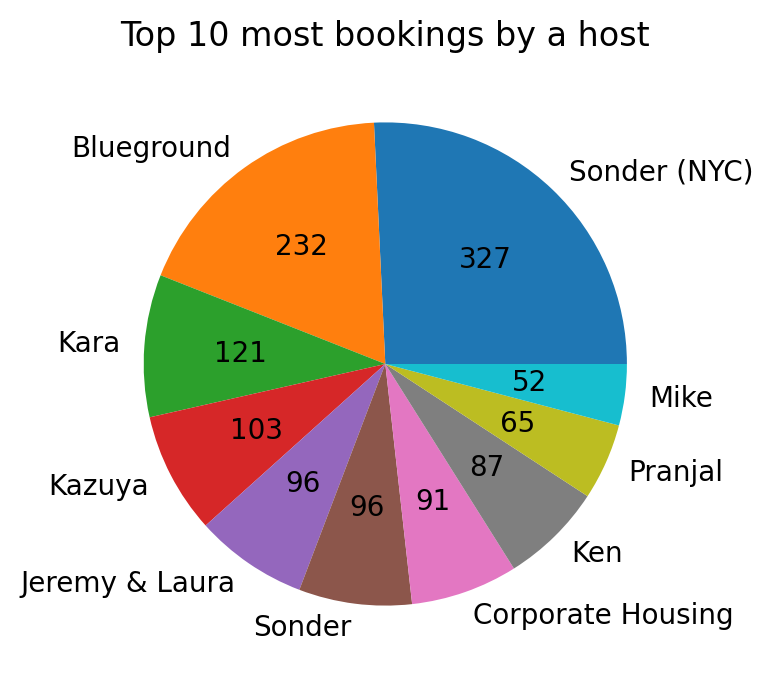

In [22]:
plt.figure(figsize=(10,4),dpi=200)
plt.pie(data=host_no_of_bookings.head(10),x='No of bookings',labels='host_name',autopct=lambda pct:func(pct,host_no_of_bookings.head(10)['No of bookings']),)
plt.title('Top 10 most bookings by a host')

([<matplotlib.patches.Wedge at 0x1da9a2d8e80>,
 [Text(0.7593255639191226, 0.7958798200601058, 'Sonder (NYC)'),
  Text(-0.6399419170506827, 0.8946923173926874, 'Blueground'),
  Text(-1.0967673024048732, 0.08427030541974934, 'Kara'),
  Text(-0.9770000909653376, -0.5054412154283843, 'Kazuya'),
  Text(-0.6221121154272731, -0.907180531007254, 'Jeremy & Laura'),
  Text(-0.13840641643284343, -1.091257835660399, 'Sonder'),
  Text(0.3631235549709802, -1.0383358242039218, 'Corporate Housing'),
  Text(0.771054143671646, -0.784522471014556, 'Ken'),
  Text(1.0052686100673398, -0.4465814837331246, 'Pranjal'),
  Text(1.0909121260859511, -0.1411053973405351, 'Mike')],
 [Text(0.4141775803195214, 0.43411626548733045, '327'),
  Text(-0.34905922748219054, 0.48801399130510215, '232'),
  Text(-0.598236710402658, 0.04596562113804509, '121'),
  Text(-0.5329091405265477, -0.2756952084154823, '103'),
  Text(-0.3393338811421489, -0.49482574418577485, '96'),
  Text(-0.07549440896336913, -0.5952315467238539, '96')

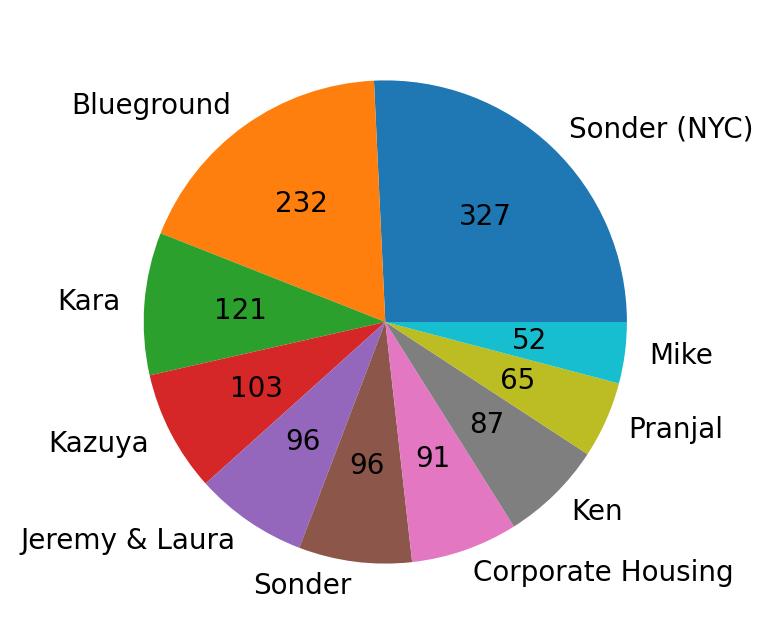

In [34]:
plt.figure(figsize=(10,4),dpi=200)
plt.pie(x='No of bookings',labels='host_name',data=host_no_of_bookings.head(10),autopct=lambda x :int(round(x/100*sum(host_no_of_bookings['No of bookings'].head(10)),2)))

In [24]:
df[['room_type','availability_365']].sort_values(by='availability_365',ascending=False)

,room_type,availability_365
0,Private room,365
11591,Private room,365
41757,Entire home/apt,365
41747,Entire home/apt,365
41742,Private room,365
...,...,...
18649,Private room,0
18650,Private room,0
18651,Private room,0
18654,Private room,0


In [25]:
pd.DataFrame(df.groupby(by=['name','room_type'])['availability_365'].max().reset_index()).sort_values(by='availability_365',ascending=False)

,name,room_type,availability_365
2393,3 floors of luxury!,Entire home/apt,365
42309,Sunny Midtown NYC Room,Private room,365
2072,"2800 SQ FT Loft for Off-Sites, Events, & Shoots",Entire home/apt,365
38183,Sonder | The Nash | Classic 1BR + Fitness Center,Entire home/apt,365
2096,2BR Apt - 20min to Soho,Entire home/apt,365
...,...,...,...
28351,Midtown West luxury one bedroom,Private room,0
28350,Midtown West Studio,Entire home/apt,0
7322,Bedroom on Quiet Block on the Lower East Side,Private room,0
7323,Bedroom on Riverside Park,Private room,0
